Epoch 1/50
83/83 [==============================] - 13s 13ms/step - loss: 0.0168
Epoch 2/50
83/83 [==============================] - 2s 19ms/step - loss: 2.9187e-04
Epoch 3/50
83/83 [==============================] - 2s 21ms/step - loss: 2.3295e-04
Epoch 4/50
83/83 [==============================] - 1s 12ms/step - loss: 2.2249e-04
Epoch 5/50
83/83 [==============================] - 1s 13ms/step - loss: 2.3875e-04
Epoch 6/50
83/83 [==============================] - 1s 12ms/step - loss: 2.1358e-04
Epoch 7/50
83/83 [==============================] - 1s 13ms/step - loss: 2.1525e-04
Epoch 8/50
83/83 [==============================] - 1s 12ms/step - loss: 2.2113e-04
Epoch 9/50
83/83 [==============================] - 1s 13ms/step - loss: 2.1636e-04
Epoch 10/50
83/83 [==============================] - 1s 13ms/step - loss: 2.4018e-04
Epoch 11/50
83/83 [==============================] - 1s 14ms/step - loss: 2.2030e-04
Epoch 12/50
83/83 [==============================] - 1s 13ms/step - loss: 2.1

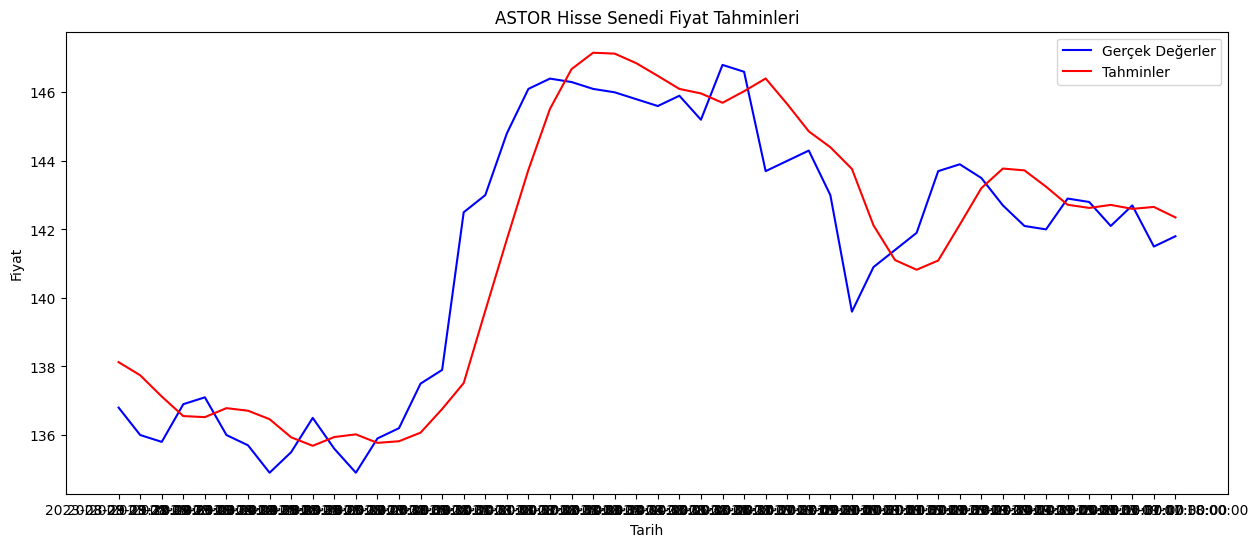

In [1]:
# Kütüphaneleri İçe Aktarma
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Veriyi Yükleme
data = pd.read_csv('BIST_ASTOR_modified.csv')
values = data['close'].values.reshape(-1, 1)

# Veriyi Normalize Etme
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(values)

# Eğitim ve Test Verisini Ayarlama (Örnek: son 50 veri noktası test seti olarak kullanılacak)
train_data = scaled_data[:-50]
test_data = scaled_data[-50:]

# Veriyi LSTM için Uygun Formata Dönüştürme
X_train, y_train = [], []

for i in range(10, len(train_data)):
    X_train.append(train_data[i-10:i])
    y_train.append(train_data[i])

X_train, y_train = np.array(X_train), np.array(y_train)

# LSTM Modelini Oluşturma
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Tahminleri Gerçekleştirme (bu kod test seti için tahminleri oluşturur)
test_inputs = scaled_data[len(scaled_data) - len(test_data) - 10:]
test_features = []

for i in range(10, 60):  # 50 test verisi + 10 önceki veri noktası
    test_features.append(test_inputs[i-10:i])

test_features = np.array(test_features)
predictions = model.predict(test_features)
predictions = scaler.inverse_transform(predictions)

# Tahminleri ve Gerçek Değerleri Karşılaştırma
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.plot(data['time'][-50:], data['close'].values[-50:], label='Gerçek Değerler', color='blue')
plt.plot(data['time'][-50:], predictions, label='Tahminler', color='red')
plt.title('ASTOR Hisse Senedi Fiyat Tahminleri')
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.legend()
plt.show()


Epoch 1/50
83/83 [==============================] - 5s 14ms/step - loss: 0.0126
Epoch 2/50
83/83 [==============================] - 1s 14ms/step - loss: 2.2396e-04
Epoch 3/50
83/83 [==============================] - 1s 14ms/step - loss: 2.2595e-04
Epoch 4/50
83/83 [==============================] - 1s 15ms/step - loss: 2.0855e-04
Epoch 5/50
83/83 [==============================] - 1s 16ms/step - loss: 2.0222e-04
Epoch 6/50
83/83 [==============================] - 2s 22ms/step - loss: 2.0762e-04
Epoch 7/50
83/83 [==============================] - 2s 18ms/step - loss: 2.2014e-04
Epoch 8/50
83/83 [==============================] - 1s 14ms/step - loss: 2.0578e-04
Epoch 9/50
83/83 [==============================] - 1s 14ms/step - loss: 2.4361e-04
Epoch 10/50
83/83 [==============================] - 3s 32ms/step - loss: 2.1520e-04
Epoch 11/50
83/83 [==============================] - 2s 22ms/step - loss: 1.9803e-04
Epoch 12/50
83/83 [==============================] - 1s 15ms/step - loss: 2.15

TypeError: ignored

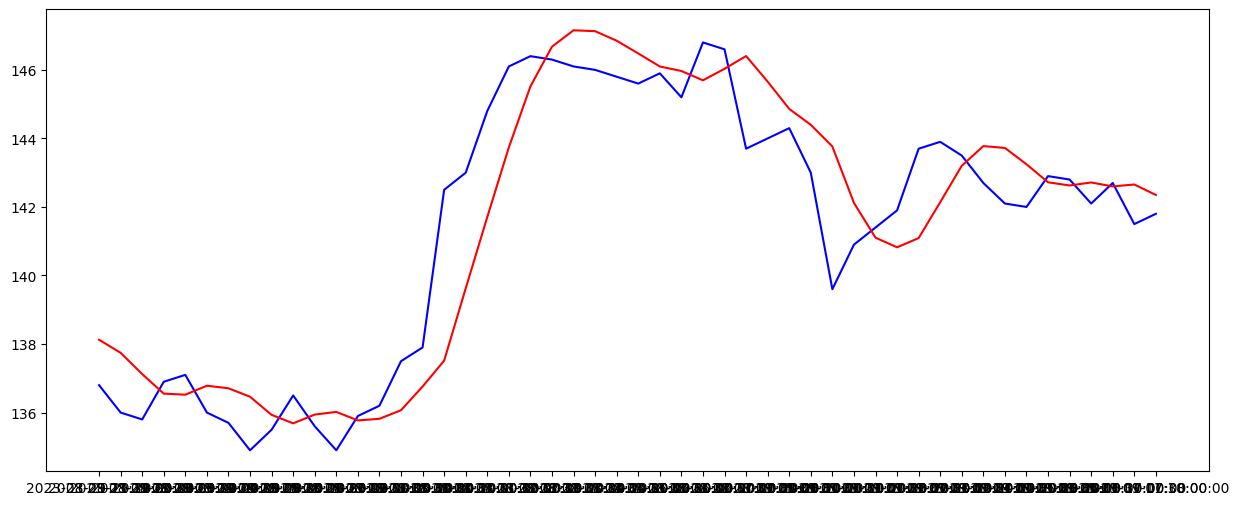

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Veriyi Yükleme
data = pd.read_csv('BIST_ASTOR_modified.csv')
values = data['close'].values.reshape(-1, 1)

# Veriyi Normalize Etme
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(values)

# Eğitim ve Test Verisini Ayarlama
train_data = scaled_data[:-50]
test_data = scaled_data[-50:]

# Veriyi LSTM için Uygun Formata Dönüştürme
X_train, y_train = [], []

for i in range(10, len(train_data)):
    X_train.append(train_data[i-10:i])
    y_train.append(train_data[i])

X_train, y_train = np.array(X_train), np.array(y_train)

# LSTM Modelini Oluşturma
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Geleceğe Yönelik Tahminleri Oluşturma
future_days = 100
predictions_future = []
last_10_days = test_inputs[-10:]

for i in range(future_days):
    future_pred = model.predict(last_10_days.reshape(1, 10, 1))
    predictions_future.append(future_pred[0][0])

    last_10_days = np.append(last_10_days[1:], future_pred)

predictions_future = scaler.inverse_transform(np.array(predictions_future).reshape(-1, 1))

# Grafikle Gösterme
last_date = pd.Timestamp(data['time'].iloc[-1])
dates_future = pd.date_range(last_date, periods=future_days + 1)[1:].tz_localize(None)

plt.figure(figsize=(15,6))
plt.plot(data['time'][-50:], data['close'].values[-50:], label='Gerçek Değerler', color='blue')
plt.plot(data['time'][-50:], predictions[-50:], label='Tahminler', color='red')
plt.plot(dates_future, predictions_future, label='Geleceğe Yönelik Tahminler', color='green')
plt.title('ASTOR Hisse Senedi Fiyat Tahminleri ve Geleceğe Yönelik Tahminler')
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.legend()
plt.show()


Epoch 1/50
83/83 [==============================] - 7s 14ms/step - loss: 0.0124
Epoch 2/50
83/83 [==============================] - 1s 13ms/step - loss: 2.4177e-04
Epoch 3/50
83/83 [==============================] - 1s 13ms/step - loss: 2.2580e-04
Epoch 4/50
83/83 [==============================] - 1s 14ms/step - loss: 2.1302e-04
Epoch 5/50
83/83 [==============================] - 1s 13ms/step - loss: 2.1622e-04
Epoch 6/50
83/83 [==============================] - 1s 18ms/step - loss: 2.1393e-04
Epoch 7/50
83/83 [==============================] - 2s 21ms/step - loss: 2.1189e-04
Epoch 8/50
83/83 [==============================] - 1s 16ms/step - loss: 2.0206e-04
Epoch 9/50
83/83 [==============================] - 1s 14ms/step - loss: 2.2810e-04
Epoch 10/50
83/83 [==============================] - 1s 14ms/step - loss: 2.2040e-04
Epoch 11/50
83/83 [==============================] - 1s 13ms/step - loss: 2.0718e-04
Epoch 12/50
83/83 [==============================] - 1s 13ms/step - loss: 2.05

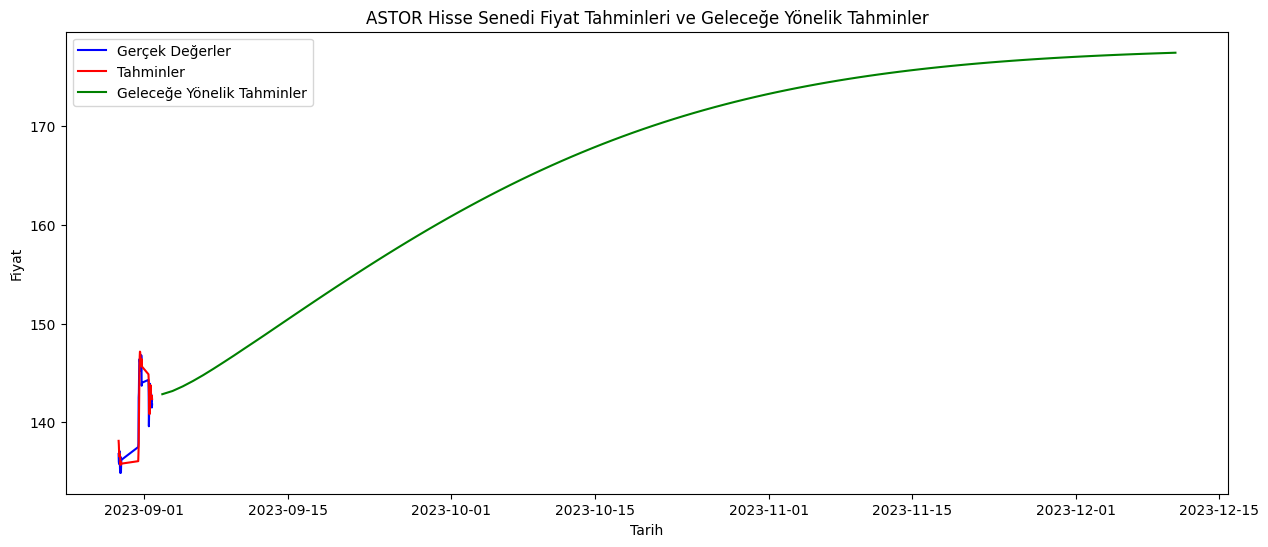

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Veriyi Yükleme
data = pd.read_csv('BIST_ASTOR_modified.csv')

# 'time' sütununu datetime formatına dönüştürme
data['time'] = pd.to_datetime(data['time'])

values = data['close'].values.reshape(-1, 1)

# Veriyi Normalize Etme
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(values)

# Eğitim ve Test Verisini Ayarlama
train_data = scaled_data[:-50]
test_data = scaled_data[-50:]

# Veriyi LSTM için Uygun Formata Dönüştürme
X_train, y_train = [], []

for i in range(10, len(train_data)):
    X_train.append(train_data[i-10:i])
    y_train.append(train_data[i])

X_train, y_train = np.array(X_train), np.array(y_train)

# LSTM Modelini Oluşturma
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Geleceğe Yönelik Tahminleri Oluşturma
future_days = 100
predictions_future = []
last_10_days = test_inputs[-10:]

for i in range(future_days):
    future_pred = model.predict(last_10_days.reshape(1, 10, 1))
    predictions_future.append(future_pred[0][0])

    last_10_days = np.append(last_10_days[1:], future_pred)

predictions_future = scaler.inverse_transform(np.array(predictions_future).reshape(-1, 1))

# Grafikle Gösterme
last_date = data['time'].iloc[-1]
dates_future = pd.date_range(last_date, periods=future_days + 1)[1:].tz_localize(None)

plt.figure(figsize=(15,6))
plt.plot(data['time'][-50:], data['close'].values[-50:], label='Gerçek Değerler', color='blue')
plt.plot(data['time'][-50:], predictions[-50:], label='Tahminler', color='red')
plt.plot(dates_future, predictions_future, label='Geleceğe Yönelik Tahminler', color='green')
plt.title('ASTOR Hisse Senedi Fiyat Tahminleri ve Geleceğe Yönelik Tahminler')
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.legend()
plt.show()
